# Uncertainty evaluation
## The model was (already) trained 700 times with different random seeds

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler    
import random
import torch.autograd as autograd
import torch.nn.functional as F

import torch.autograd as autograd
import pickle
from sklearn.decomposition import PCA
random_seed = 99
torch.manual_seed(random_seed)
random.seed(random_seed)
DEVICE = torch.device('cpu')

In [3]:
params = pickle.load(open('wgan_best_parameters.pkl', 'rb'))
params_model = pickle.load(open('wgan_best_model_parameters.pkl', 'rb'))
params.update(params_model)
print(params)

{'lr_auto': 0.006435632456005054, 'epochs_autoen': 87, 'lr_wgan': 0.0028886418155533253, 'iters': 1031, 'critic_iters': 8, 'lambda': 6, 'emb_dim': 321, 'random_dim': 22}


In [ ]:
batch_size = 128
lr_wgan = params.get('lr_wgan')
lr_auto = params.get('lr_auto')
seq_len = 5000 # initial space
emb_dim = params.get('emb_dim') # encoded space
random_dim = params.get('random_dim')  # latent space for the generator model
epochs_autoen = params.get('epochs_autoen') #epochs to train autoencoder
ITERS = params.get('iters') # iterations to train WGAN
CRITIC_ITERS = params.get('critic_iters')
LAMBDA = params.get('lambda') # penalty

# The model was trained 700 times with different random seeds
### The same pipeline was implemented, see 2.7-zaretskii-PCA-GAN-tuned-params-uncertainty-analysis

In [3]:
real = pickle.load(open('/Users/nzaretski/Desktop/gerda/project_git/data.pkl','rb'))
real = real.astype(float)
print(real.shape)

(2619, 5000)


In [2]:
iou_en = pickle.load(open('iou_en.pkl','rb'))
iou_cur = pickle.load(open('iou_cur.pkl','rb'))
iou_slope = pickle.load(open('iou_slope.pkl','rb'))
iou_drift = pickle.load(open('iou_drift.pkl','rb'))

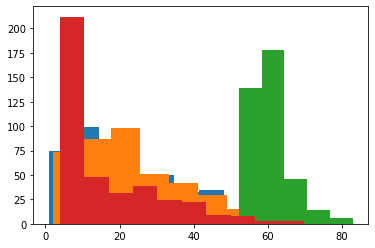

In [3]:
# a, bins, _ = plt.hist(iou_final)
a, bins_en, _ = plt.hist(iou_en)
a, bins_cur, _ = plt.hist(iou_cur)
a, bins_slope, _ = plt.hist(iou_slope)
a, bins_drift, _ = plt.hist(iou_drift)

mu:  21.208318019470752
sigma:  14.98791547610475


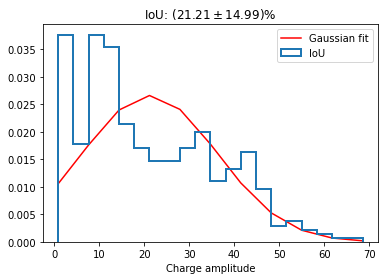

In [4]:
import scipy
mu, sigma = scipy.stats.norm.fit(iou_en)
best_fit_line = scipy.stats.norm.pdf(bins_en, mu, sigma)
plt.plot(bins_en, best_fit_line, color='red', label='Gaussian fit')
a, bins, _ = plt.hist(iou_en, density=True, bins=20, histtype = 'step', linewidth=2, label='IoU')
plt.xlabel('Charge amplitude')
plt.title('IoU: ($ {} \pm {}) \% $'.format(round(mu, 2), round(sigma, 2)))
print('mu: ', mu)
print('sigma: ', sigma)
plt.legend()

mu:  23.209085735082702
sigma:  13.926432702632342


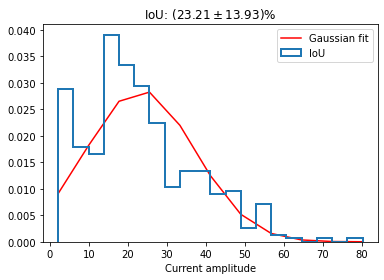

In [5]:
import scipy
mu, sigma = scipy.stats.norm.fit(iou_cur)
best_fit_line = scipy.stats.norm.pdf(bins_cur, mu, sigma)
plt.plot(bins_cur, best_fit_line, color='red', label='Gaussian fit')
a, bins, _ = plt.hist(iou_cur, density=True, bins=20, histtype = 'step', linewidth=2, label='IoU')
plt.xlabel('Current amplitude')
plt.title('IoU: ($ {} \pm {}) \% $'.format(round(mu, 2), round(sigma, 2)))
print('mu: ', mu)
print('sigma: ', sigma)
plt.legend()

mu:  59.80592733469344
sigma:  6.855132087841427


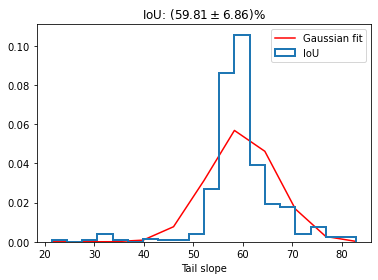

In [6]:
import scipy
mu, sigma = scipy.stats.norm.fit(iou_slope)
best_fit_line = scipy.stats.norm.pdf(bins_slope, mu, sigma)
plt.plot(bins_slope, best_fit_line, color='red', label='Gaussian fit')
a, bins, _ = plt.hist(iou_slope, density=True, bins=20, histtype = 'step', linewidth=2, label='IoU')
plt.xlabel('Tail slope')
plt.title('IoU: ($ {} \pm {}) \% $'.format(round(mu, 2), round(sigma, 2)))
print('mu: ', mu)
print('sigma: ', sigma)
plt.legend()

mu:  16.299377046560338
sigma:  14.224871051060788


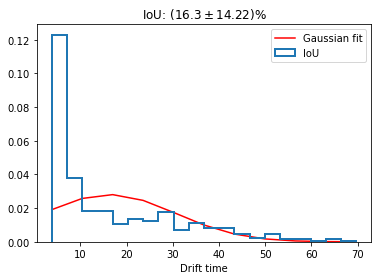

In [7]:
import scipy
mu, sigma = scipy.stats.norm.fit(iou_drift)
best_fit_line = scipy.stats.norm.pdf(bins_drift, mu, sigma)
plt.plot(bins_drift, best_fit_line, color='red', label='Gaussian fit')
a, bins, _ = plt.hist(iou_drift, density=True, bins=20, histtype = 'step', linewidth=2, label='IoU')
plt.title('IoU: ($ {} \pm {}) \% $'.format(round(mu, 2), round(sigma, 2)))
plt.xlabel('Drift time')
print('mu: ', mu)
print('sigma: ', sigma)
plt.legend()